In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


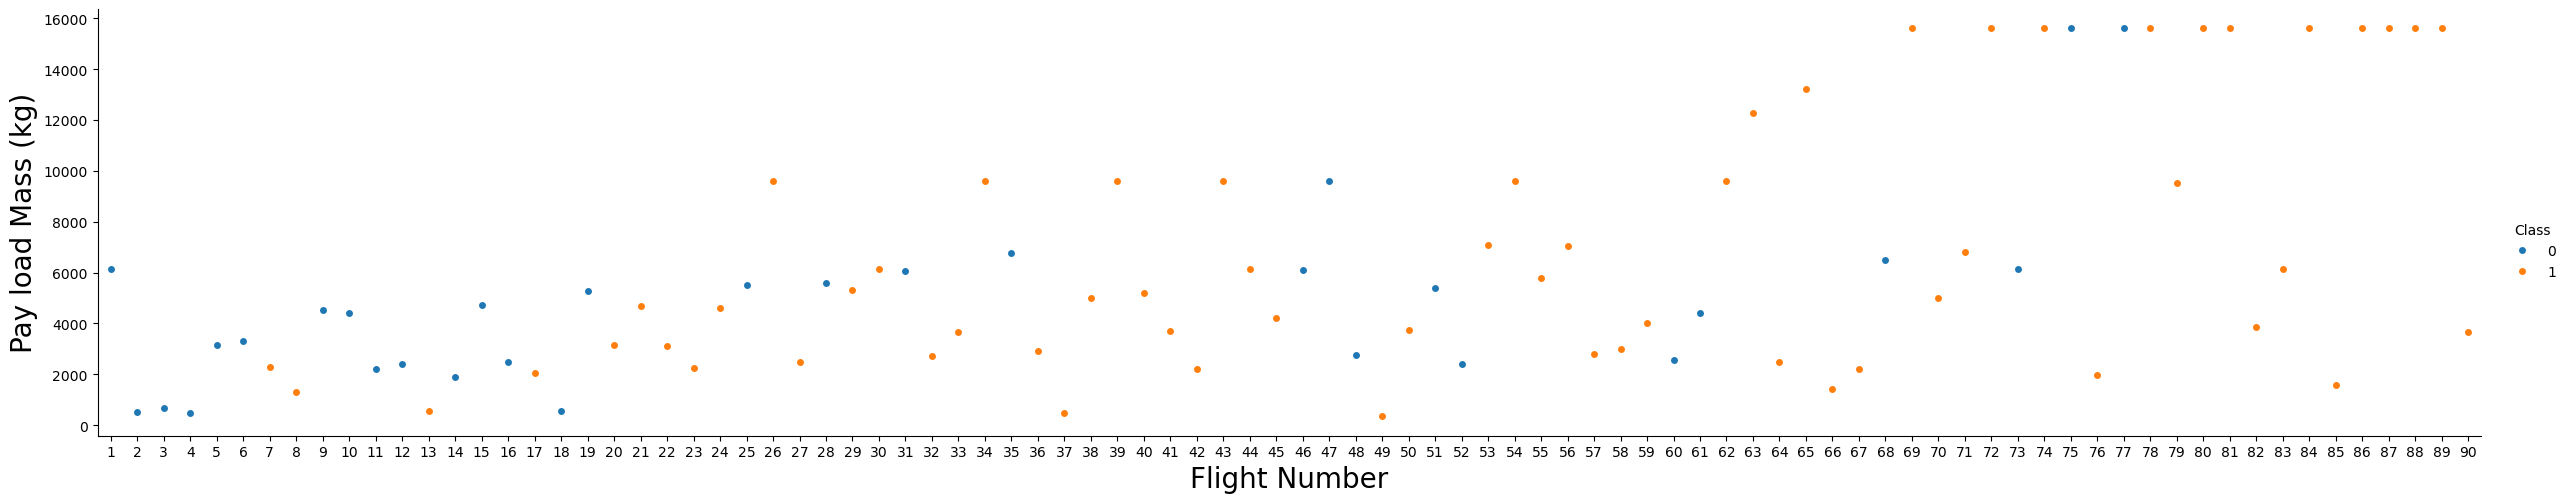

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

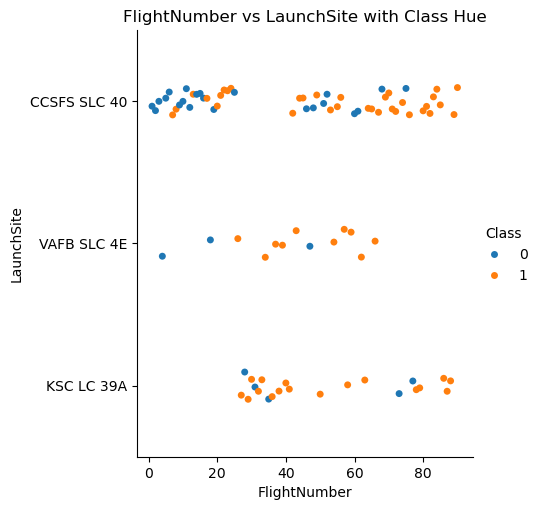

In [6]:
sns.catplot(
    data=df,
    x='FlightNumber',
    y='LaunchSite',
    hue='Class',    
)

plt.title('FlightNumber vs LaunchSite with Class Hue')
plt.show()

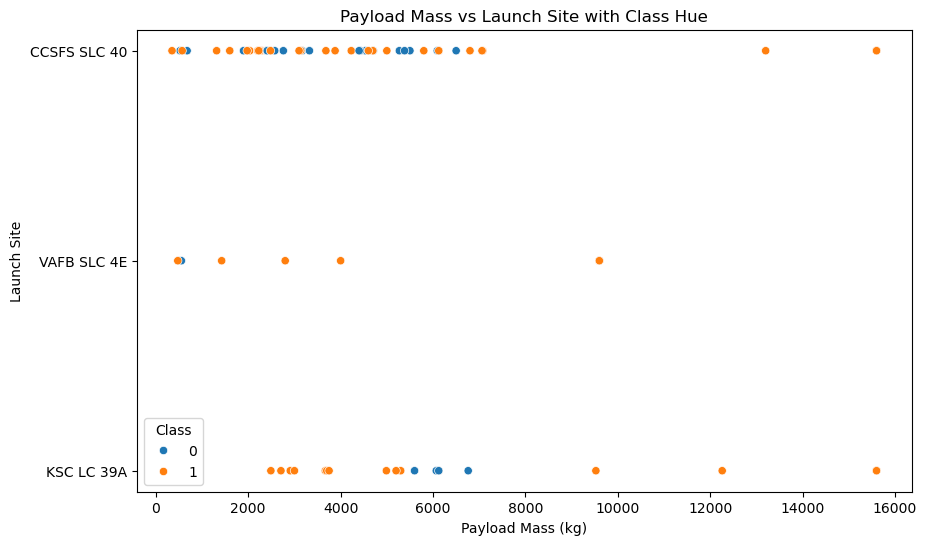

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='PayloadMass',
    y='LaunchSite',
    hue='Class'
)

# Set the title and show the plot
plt.title('Payload Mass vs Launch Site with Class Hue')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()

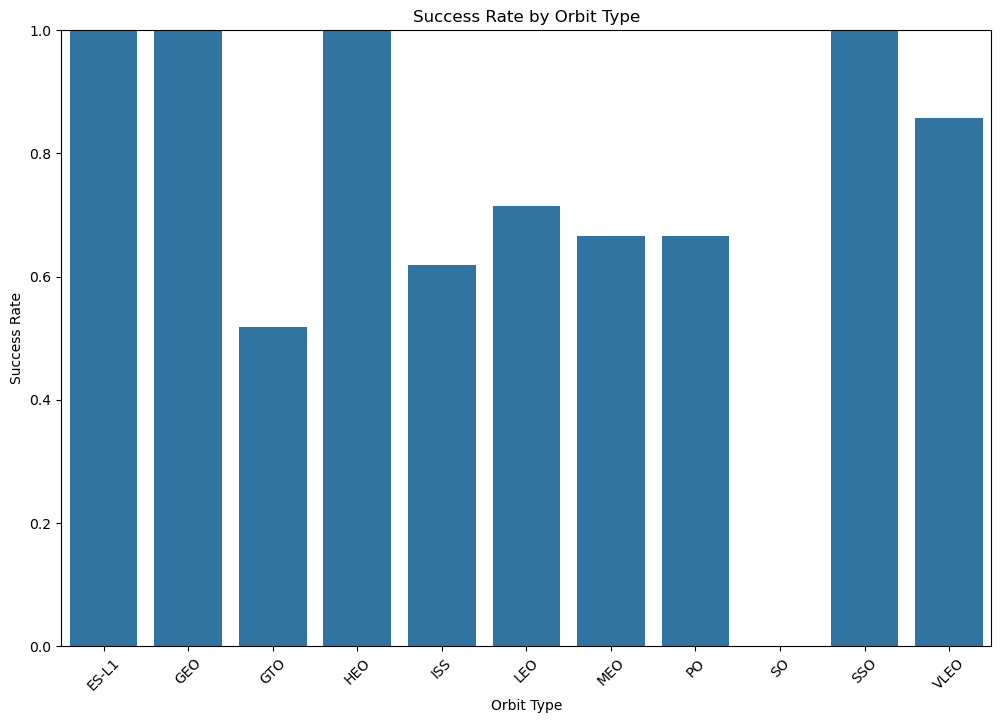

In [11]:
success_rate = df.groupby('Orbit')['Class'].mean().reset_index()
success_rate.columns = ['Orbit', 'Success Rate']

plt.figure(figsize=(12, 8))
sns.barplot(
    data=success_rate,
    x='Orbit',
    y='Success Rate',)

plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.ylim(0, 1) 

plt.xticks(rotation=45)  
plt.show()

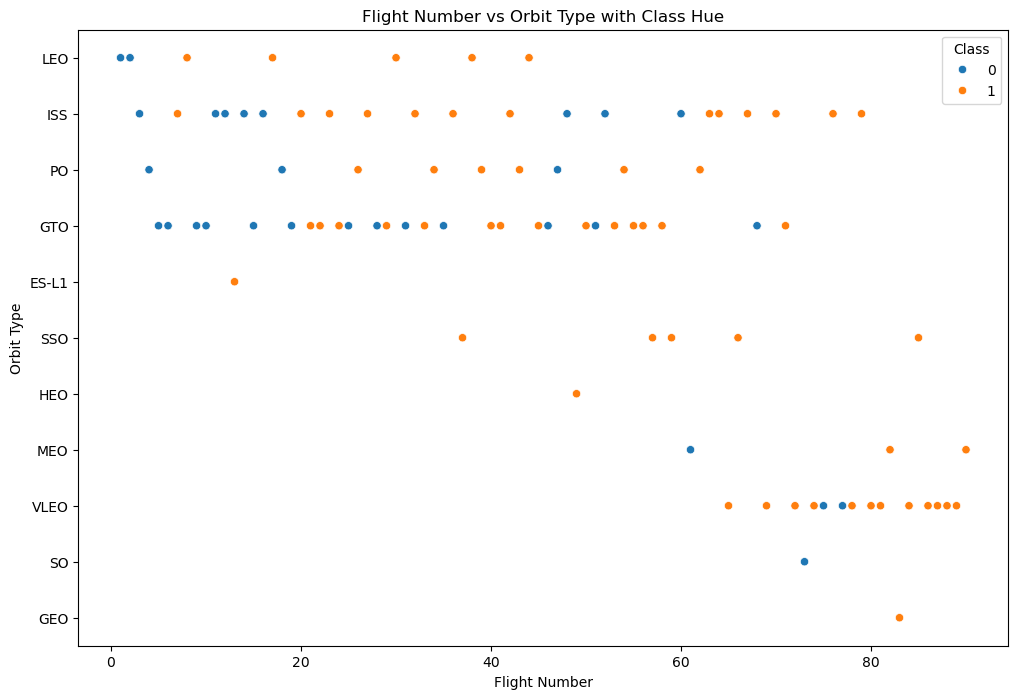

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='FlightNumber',
    y='Orbit',
    hue='Class'
)

plt.title('Flight Number vs Orbit Type with Class Hue')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.legend(title='Class')
plt.show()

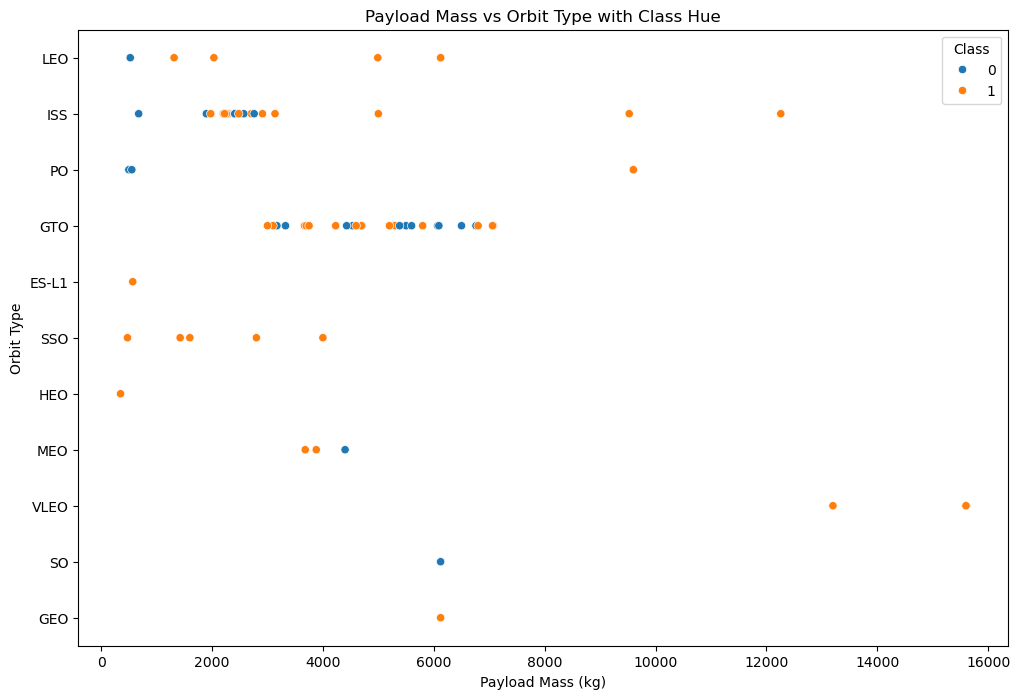

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='PayloadMass',
    y='Orbit',
    hue='Class'
)

plt.title('Payload Mass vs Orbit Type with Class Hue')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.legend(title='Class')
plt.show()

In [17]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


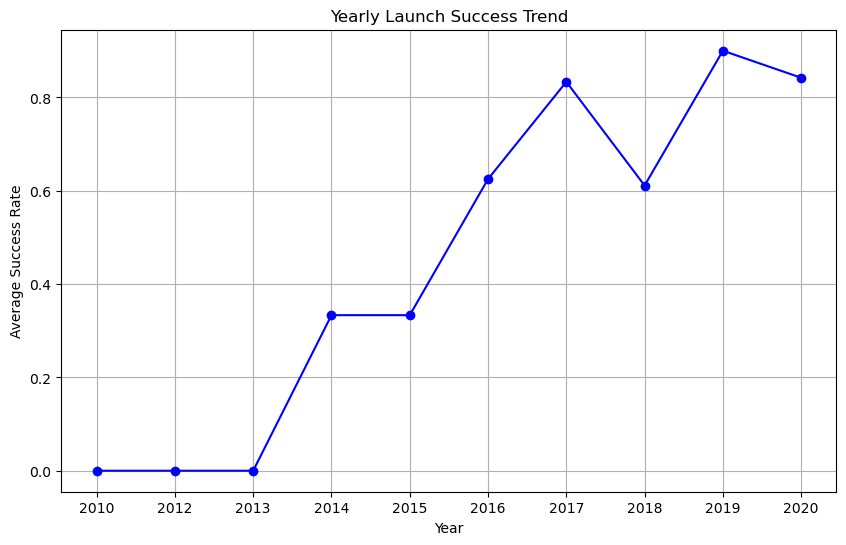

In [19]:
success_rate_per_year = df.groupby('Date')['Class'].mean().reset_index()
success_rate_per_year.columns = ['Date', 'SuccessRate']

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(success_rate_per_year['Date'], success_rate_per_year['SuccessRate'], marker='o', linestyle='-', color='b')
plt.title('Yearly Launch Success Trend')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.grid(True)
plt.show()

In [21]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [23]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
features_one_hot = features_one_hot.astype('float64')

print(features_one_hot.dtypes)
print(features_one_hot.head())

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object
   FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0           1.0  6123.547647      1.0       0.0     0.0   0.0    1.0   
1           2.0   525.000000      1.0       0.0     0.0   0.0    1.0   
2           3.0   677.000000      1.0       0.0     0.0   0.0    1.0   
3           4.0   500.000000      1.0       0.0     0.0   0.0    1.0   
4           5.0  3170.000000      1.0       0.0     0.0   0.0    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1048  Serial_B1049  \
0          0.0          0.0        0.0  ...           0.0           0.0   
1          0.0          0.0        0.0  ...           0.0           0.0   
2          0.0          0.0        0.0  ...         

In [27]:
features_one_hot.shape

(90, 80)